Dataset from: http://ayrancianadolu.meb.k12.tr/

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications import imagenet_utils
from keras.applications import vgg16
from keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy

from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.models import Model

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_path  = 'drive/My Drive/dataset/train'
valid_path  = 'drive/My Drive/dataset/valid'
test_path  = 'drive/My Drive/dataset/test'

In [ ]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, 
                                                         target_size=(224,224), 
                                                         batch_size=10)

valid_batches = ImageDataGenerator().flow_from_directory(valid_path,
                                                         target_size=(224,224), 
                                                         batch_size=30)

test_batches = ImageDataGenerator().flow_from_directory(test_path, 
                                                        target_size=(224,224), 
                                                        batch_size=50, 
                                                        shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


<center><img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16.png" width="75%"></center>

In [ ]:
base_model = vgg16.VGG16(weights = "imagenet", include_top=False, input_shape = (224,224, 3), pooling='avg')
base_model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [ ]:
for layer in base_model.layers[:-5]:
    layer.trainable = False

base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
last_layer = base_model.get_layer('global_average_pooling2d')
last_output = last_layer.output
x = Dense(10, activation='softmax', name='softmax')(last_output)
new_model = Model(inputs=base_model.input, outputs=x)

new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
new_model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.hdf5', save_best_only=True)

history = new_model.fit_generator(train_batches, steps_per_epoch=18,
                   validation_data=valid_batches, validation_steps=3, epochs=20, verbose=1, callbacks=[checkpointer])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
18/18 [==============================] - 190s 10s/step - loss: 4.8458 - accuracy: 0.2286 - val_loss: 1.8726 - val_accuracy: 0.3111
Epoch 2/20
18/18 [==============================] - 133s 8s/step - loss: 1.7056 - accuracy: 0.4729 - val_loss: 1.2375 - val_accuracy: 0.5889
Epoch 3/20
18/18 [==============================] - 114s 6s/step - loss: 1.4415 - accuracy: 0.4922 - val_loss: 0.6844 - val_accuracy: 0.8000
Epoch 4/20
18/18 [==============================] - 98s 5s/step - loss: 0.4920 - accuracy: 0.8715 - val_loss: 0.4813 - val_accuracy: 0.8556
Epoch 5/20
18/18 [==============================] - 81s 4s/step - loss: 0.3689 - accuracy: 0.8567 - val_loss: 1.0586 - val_accuracy: 0.7111
Epoch 6/20
18/18 [==============================] - 67s 4s/step - loss: 0.5421 - accuracy: 0.8713 - val_loss: 0.2618 - val_accuracy: 0.9444
Epoch 7/20
18/18 [==============================] - 60s 3s/step - loss: 0.2319 - accuracy: 0.9047 - val_loss: 0.1805 - val_accuracy: 0.9444
Epoch 8/20
18/18

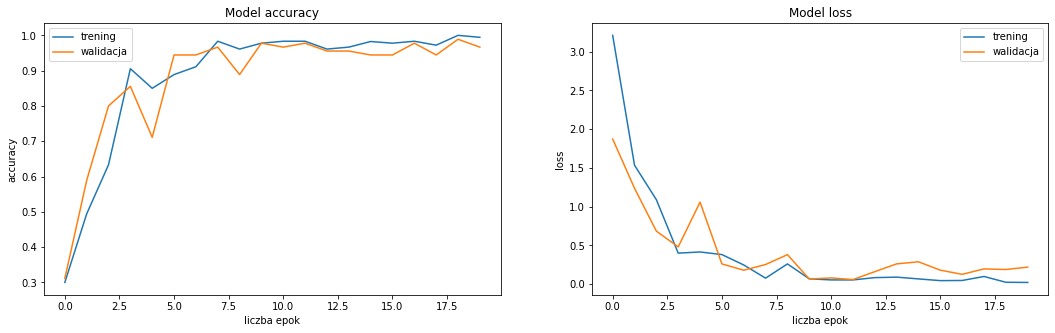

In [ ]:
figure, axis = plt.subplots(1, 2, figsize=(18,5))
axis = axis.ravel()

for i,element in enumerate(['accuracy', 'loss']):
    axis[i].plot(history.history[element])
    axis[i].plot(history.history['val_' + element])
    axis[i].set_title('Model {}'.format(element))
    axis[i].set_xlabel('liczba epok')
    axis[i].set_ylabel(element)
    axis[i].legend(['trening', 'walidacja'])

In [ ]:
from sklearn.datasets import load_files
from keras.utils import np_utils
import numpy as np

def load_dataset(path):
    data = load_files(path)
    paths = np.array(data['filenames'])
    targets = np_utils.to_categorical(np.array(data['target']))
    return paths, targets

test_files, test_targets = load_dataset('drive/My Drive/dataset/test')

In [ ]:
from keras.preprocessing import image  
from keras.applications.vgg16 import preprocess_input
from tqdm import tqdm

def path_to_tensor(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

test_tensors = preprocess_input(paths_to_tensor(test_files))

100%|██████████| 50/50 [00:00<00:00, 448.94it/s]


In [ ]:
print('\nStrata (loss): {:.4f}\nDokładność (accuracy): {:.4f}'.format(*new_model.evaluate(test_tensors, test_targets)))

2/2 [==============================] - 3s 979ms/step - loss: 0.1519 - accuracy: 0.9600

Strata (loss): 0.1519
Dokładność (accuracy): 0.9600


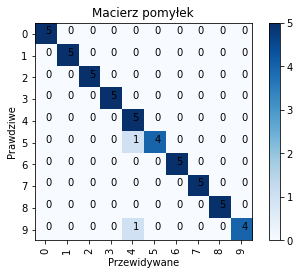

In [ ]:
from sklearn.metrics import confusion_matrix

cm_labels = ['0','1','2','3','4','5','6','7','8','9']

cm = confusion_matrix(np.argmax(test_targets, axis=1),
                      np.argmax(new_model.predict(test_tensors), axis=1))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
indexes = np.arange(len(cm_labels))
for i in indexes:
    for j in indexes:
        plt.text(j, i, cm[i, j])
plt.xticks(indexes, cm_labels, rotation=90)
plt.xlabel('Przewidywane')
plt.yticks(indexes, cm_labels)
plt.ylabel('Prawdziwe')
plt.title('Macierz pomyłek')
plt.show()